## This notebook performs the data processing, exploratory data analysis, and finalizes the data for predictive modeling saved under data folder.

In [24]:
# laoding libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import joblib
import seaborn as sns
import math
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from scipy import stats
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

pd.set_option('display.max_columns', None)

In [25]:
# loading data
file_path = './data/daily_ridership_weather_holi_data.csv'
df = pd.read_csv(file_path, parse_dates=['date'])
print('data shape: ', df.shape)
df.head()

data shape:  (1325, 26)


,date,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,weekend,weather_categories,ridership,holidayName,is_holiday
0,2021-05-17,2.0,73.2605,49.230500,61.965496,73.28378,46.221603,59.330765,0,0,52304.660,48824.312,0.0,0.0,0.0,0.0,11.805341,23.264800,219.91373,25.93,0.197353,0,Clear or Fair Weather,2029893,No holiday,0
1,2021-05-18,3.0,79.6505,51.930500,66.926750,76.98160,48.650776,64.101105,0,0,52414.355,48361.410,0.0,0.0,0.0,0.0,9.223387,16.330101,254.71307,24.97,0.212411,0,Clear or Fair Weather,2160226,No holiday,0
2,2021-05-19,3.0,83.5205,55.440500,69.382990,81.58029,53.284020,67.238690,0,0,52521.727,49024.887,0.0,0.0,0.0,0.0,11.858211,22.593700,350.79745,28.52,0.247352,0,Clear or Fair Weather,2267376,No holiday,0
3,2021-05-20,3.0,70.8305,54.090500,61.635498,67.69969,52.316616,58.842113,0,0,52626.652,49004.203,0.0,0.0,0.0,0.0,12.545163,23.041100,145.46165,28.03,0.195585,0,Clear or Fair Weather,2278700,No holiday,0
4,2021-05-21,3.0,73.4405,53.100502,63.814250,73.14134,50.822243,61.701250,0,0,52728.977,49215.938,0.0,0.0,0.0,0.0,12.211643,23.264800,173.92244,28.03,0.200039,0,Clear or Fair Weather,2338148,No holiday,0


### Exploratory Data Analysis

In [26]:
print("Printing nulls:\n", df.isnull().sum())
df.describe()

Printing nulls:
 date                           0
weather_code                   0
temperature_2m_max             0
temperature_2m_min             0
temperature_2m_mean            0
apparent_temperature_max       0
apparent_temperature_min       0
apparent_temperature_mean      0
sunrise                        0
sunset                         0
daylight_duration              0
sunshine_duration              0
precipitation_sum              0
rain_sum                       0
snowfall_sum                   0
precipitation_hours            0
wind_speed_10m_max             0
wind_gusts_10m_max             0
wind_direction_10m_dominant    0
shortwave_radiation_sum        0
et0_fao_evapotranspiration     0
weekend                        0
weather_categories             0
ridership                      0
holidayName                    0
is_holiday                     0
dtype: int64


,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,weekend,ridership,is_holiday
count,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.0,1325.0,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1.325000e+03,1325.000000
mean,31.457358,64.633541,48.176583,56.100550,61.853144,44.436457,52.974819,0.0,0.0,44106.620657,30656.036575,0.154262,0.149256,0.035088,3.670943,13.186178,23.713382,205.447928,14.873653,0.114372,0.285283,2.965145e+06,0.083774
std,28.438714,17.218366,16.089835,16.262701,21.860791,20.461783,20.780197,0.0,0.0,7341.172693,14685.719332,0.410067,0.408367,0.305278,5.434764,4.289828,7.196711,99.049678,7.429273,0.067362,0.451720,8.257943e+05,0.277153
min,0.000000,18.360500,0.540497,12.506751,9.128141,-11.341751,-1.811794,0.0,0.0,33294.400000,0.000000,0.000000,0.000000,0.000000,0.000000,3.882661,7.605800,0.099794,1.050000,0.009508,0.000000,7.483310e+05,0.000000
25%,3.000000,50.670500,35.190500,42.390500,43.838573,27.672165,35.375896,0.0,0.0,36957.363000,22748.178000,0.000000,0.000000,0.000000,0.000000,10.183879,18.790798,135.414520,8.810000,0.055344,0.000000,2.270076e+06,0.000000
50%,51.000000,66.420500,49.140500,57.360504,62.780400,44.267788,53.330738,0.0,0.0,44312.332000,33322.773000,0.003937,0.000000,0.000000,1.000000,12.608824,22.593700,222.267960,14.370000,0.104829,0.000000,3.151137e+06,0.000000
75%,61.000000,79.380490,62.370500,70.485500,80.787926,61.763386,70.871880,0.0,0.0,51401.535000,42275.047000,0.118110,0.110236,0.000000,6.000000,15.462832,27.515100,287.530240,21.240000,0.168427,1.000000,3.646292e+06,0.000000
max,75.000000,99.180500,78.930500,85.845500,104.938980,84.732330,92.446045,0.0,0.0,54347.190000,50400.000000,7.228347,7.228347,7.523622,24.000000,35.602750,61.741200,359.672580,30.290000,0.324364,1.000000,4.570716e+06,1.000000


In [27]:
print('Count of sunset not equal to zero', sum(df['sunset'] !=0))
print('Count of sunset not equal to zero',sum(df['sunrise'] !=0))
# sunset and sunrise cols are all 0's so removing them
df = df.drop(columns=['sunset', 'sunrise'])

Count of sunset not equal to zero 0
Count of sunset not equal to zero 0


In [28]:
numeric_columns = ['weather_code','temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean',
    'apparent_temperature_max', 'apparent_temperature_min', 'apparent_temperature_mean',
    'daylight_duration', 'sunshine_duration',
    'precipitation_sum', 'rain_sum', 'snowfall_sum', 'precipitation_hours',
    'wind_speed_10m_max', 'wind_gusts_10m_max', 'wind_direction_10m_dominant',
    'shortwave_radiation_sum', 'et0_fao_evapotranspiration', 'weekend', 'is_holiday'
]
df[numeric_columns] = df[numeric_columns].astype('float64')
catagorical_columns = ['weekend', 'weather_categories', 'is_holiday']

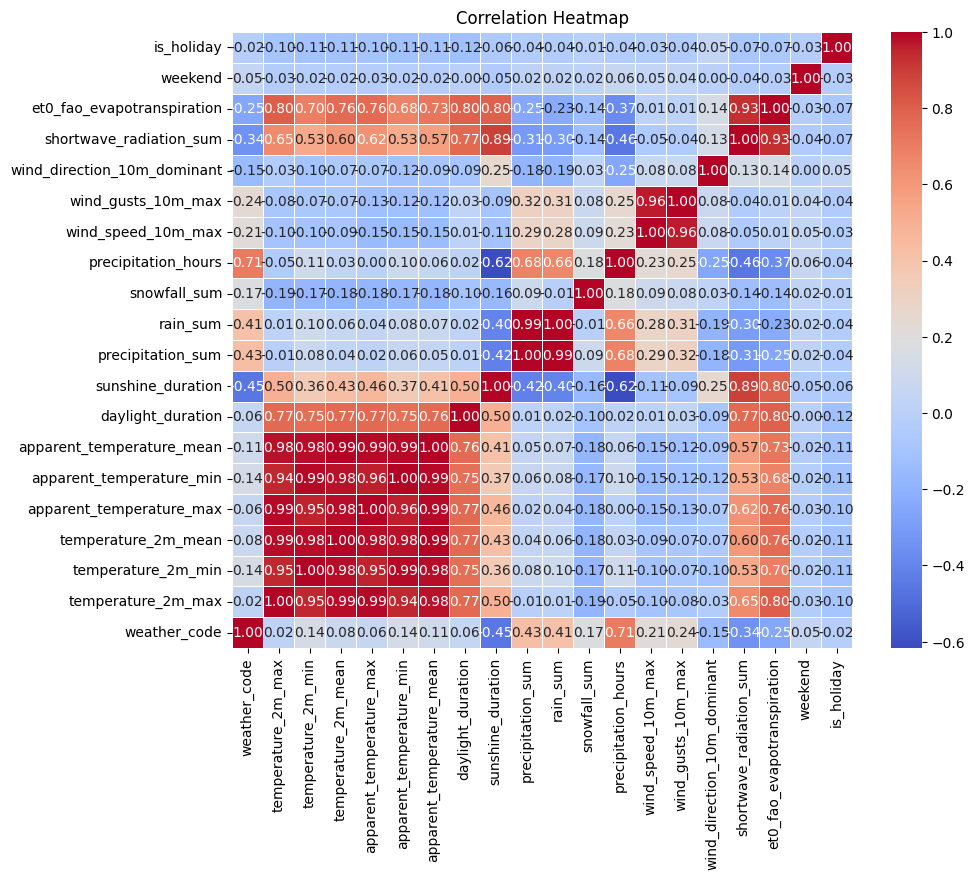

In [29]:
# creating correlation heatmap
def correlation_heatmap(df, title="Correlation Heatmap"):
    correlation_matrix = df.corr() # Pearson correlation
    plt.figure(figsize=(10, 8))  
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    # reversing the y-axis labels
    plt.yticks(rotation=0)  
    plt.gca().invert_yaxis() # inverting the y axis.

    plt.title(title)
    plt.show()

# correlation heat map plot
correlation_heatmap(df[numeric_columns], "Correlation Heatmap")

## Correlation Heatmap analysis
* Temperature values (min, max, range, average) are obviously correlated so we need to feature engineer them and remove the redundant ones.
* daytime duration and sunshine duration are also moderately correlated (0.50)to temperaure values.
* Precipitation and rain are higly correlated (0.99) so we will remove rail_sum feature to avoide multicollineraity. precipitation hours is also moderately correlated so we need to keep that in mind during model fitting for linear regressions. 
* wind_speed adn wind_gust are highly correlated (0.96)so we will remove the wind_gust.
* shortware_radiatino and et0_fao_evapotranspiration are highly correlated (0.93). We will drop et0_fao_evapotranspiration becaues it is derived from shortwave_radiation. 

## Histograms and Box plots Analysis

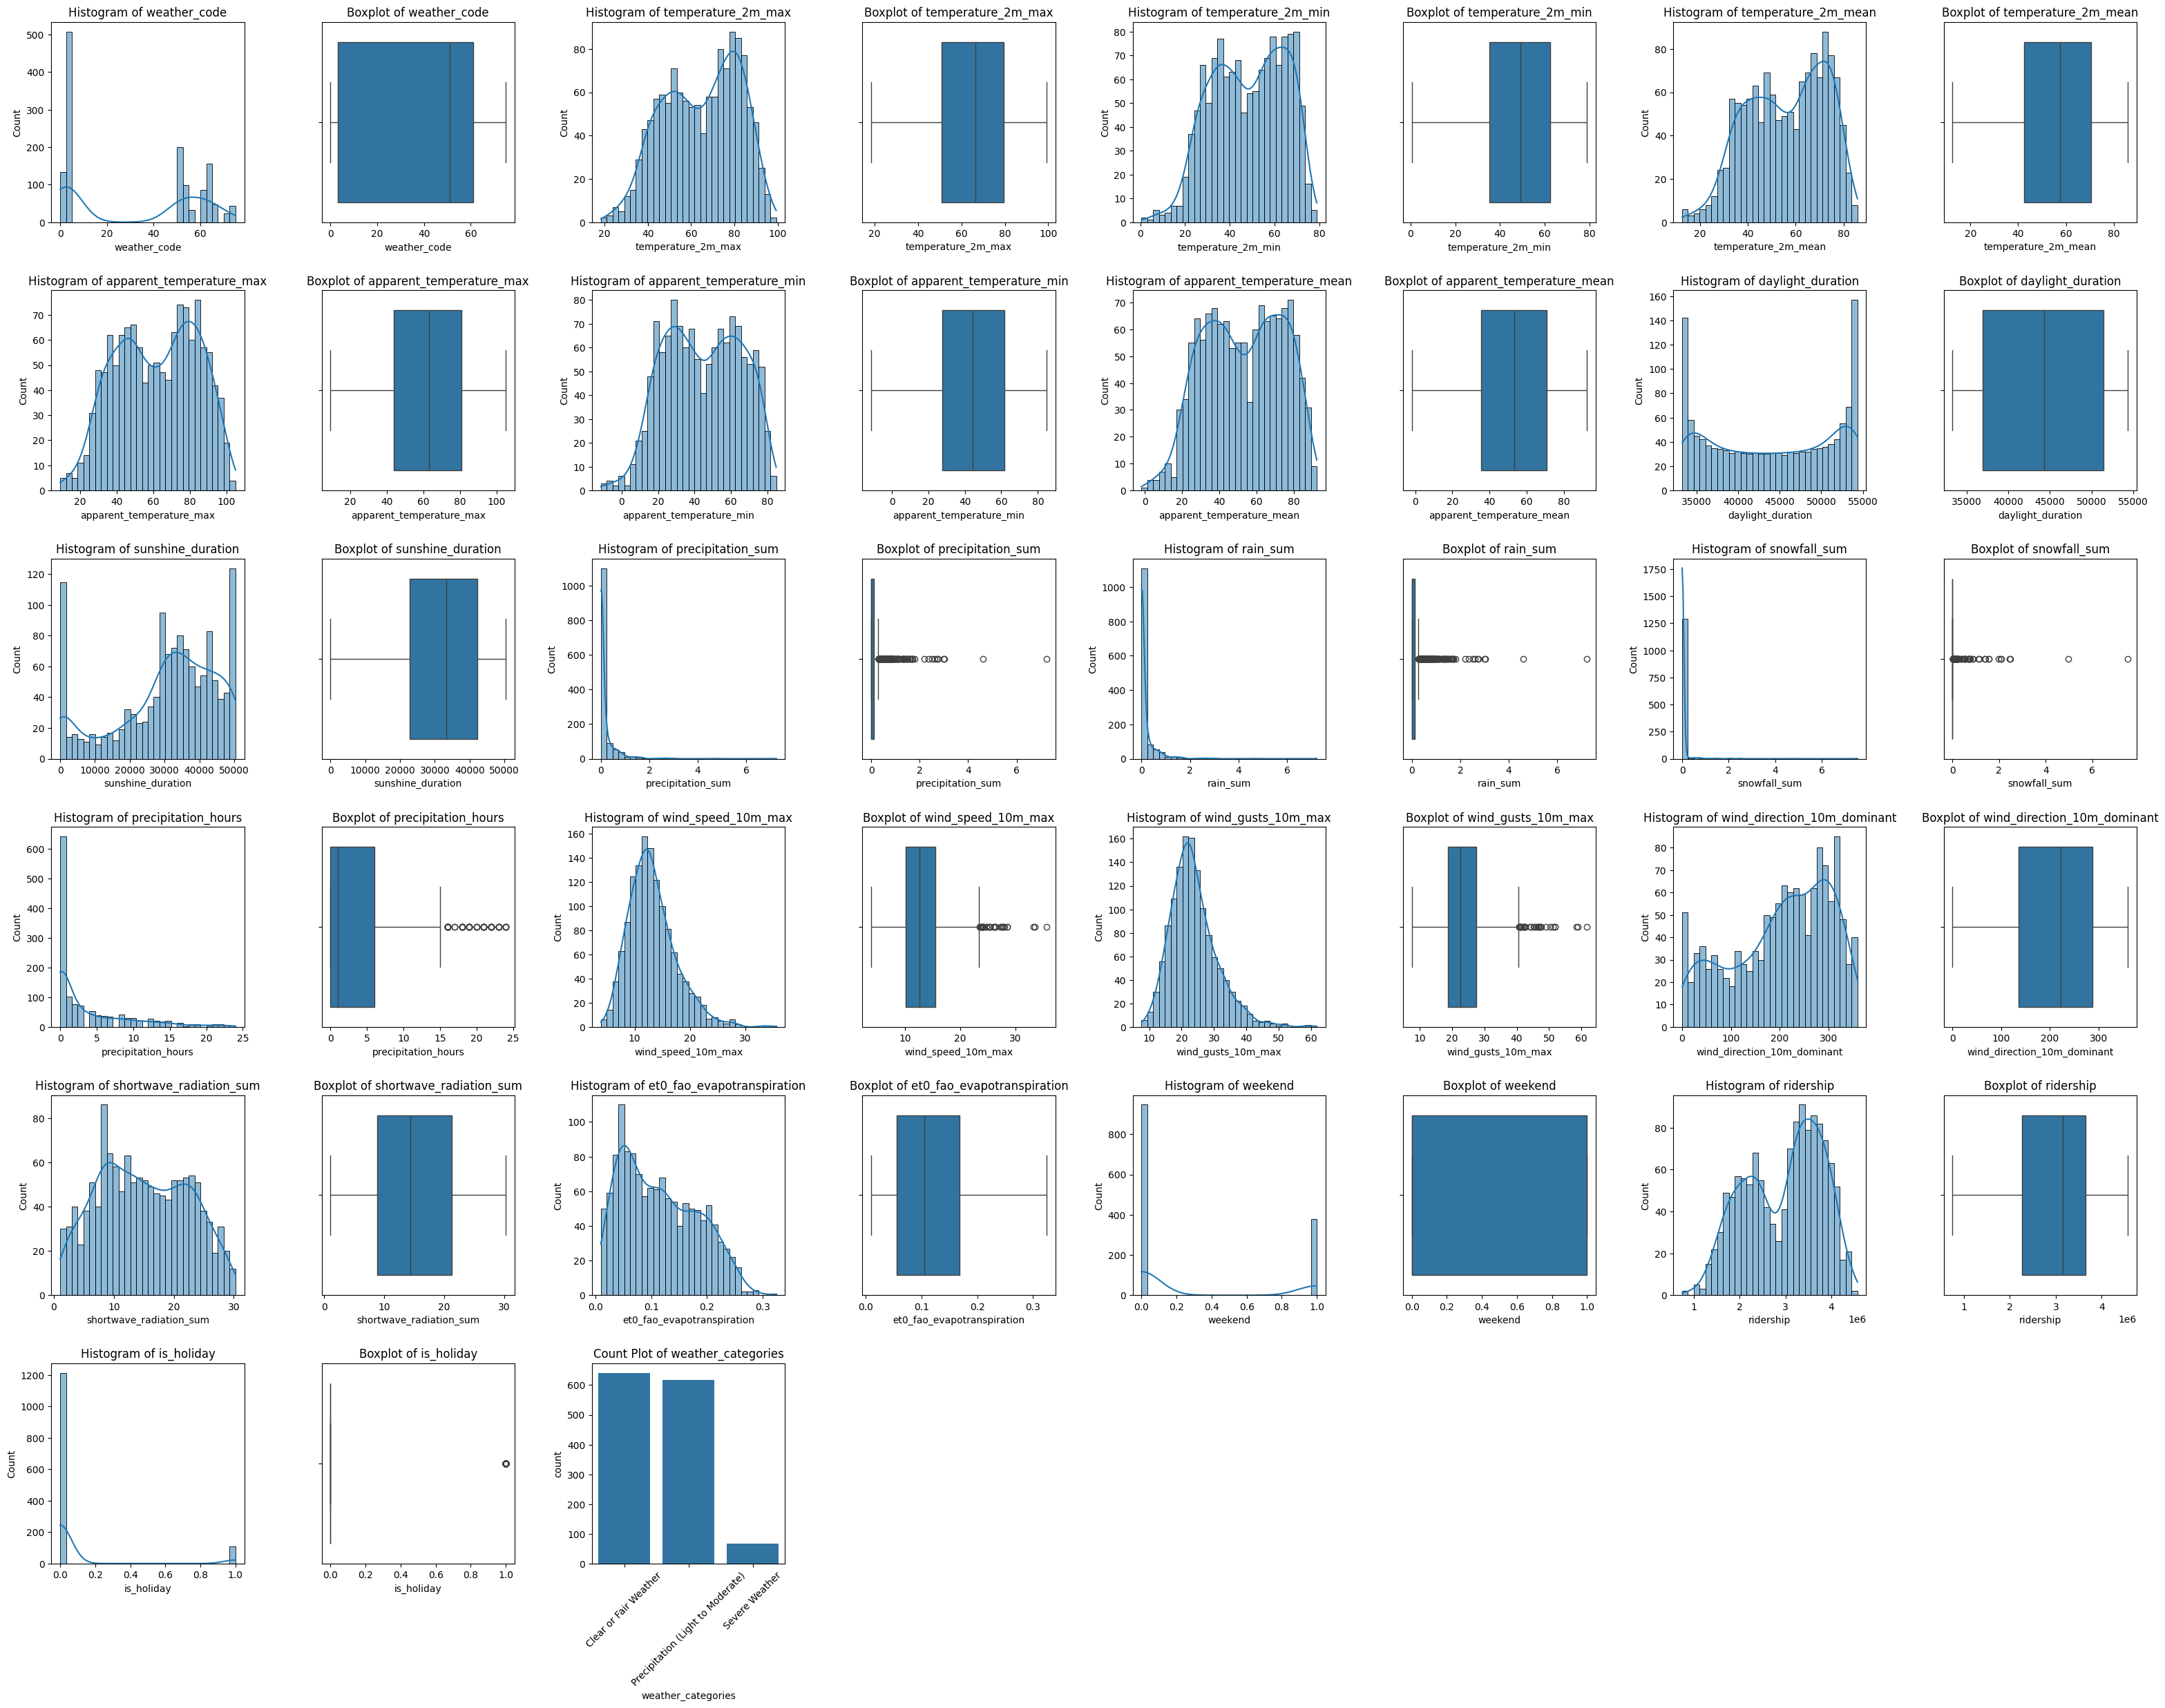

In [30]:
def univariate_analysis(df, numerical_features=None, categorical_features=None):
    if numerical_features is None:
        numerical_features = df.select_dtypes(include=['number']).columns.tolist()

    if categorical_features is None:
        categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

    num_numerical = len(numerical_features)
    num_categorical = len(categorical_features)
    total_subplots = num_numerical * 2 + num_categorical * 2

    if total_subplots == 0:
        print("No numerical or categorical features found.")
        return

    cols = 8
    rows = math.ceil(total_subplots / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4)) 
    fig.tight_layout(pad=5.0) 

    plot_index = 0

    # Numerical Features Analysis
    for feature in numerical_features:
        # Histograms
        if plot_index < total_subplots:
            ax = axes.flatten()[plot_index]
            sns.histplot(df[feature], kde=True, ax=ax, bins = 30)
            ax.set_title(f"Histogram of {feature}")
            plot_index += 1

        # Box plots
        if plot_index < total_subplots:
            ax = axes.flatten()[plot_index]
            sns.boxplot(x=df[feature], ax=ax)
            ax.set_title(f"Boxplot of {feature}")
            plot_index += 1

    # Categorical Features Analysis
    for feature in categorical_features:
        # Count plots
        if plot_index < total_subplots:
            ax = axes.flatten()[plot_index]
            sns.countplot(x=df[feature], ax=ax)
            ax.set_title(f"Count Plot of {feature}")
            ax.tick_params(axis='x', rotation=45)
            plot_index += 1

    while plot_index < rows * cols:
        fig.delaxes(axes.flatten()[plot_index])
        plot_index += 1

    plt.show()
    
# performing univariate histogram analysis    
univariate_analysis(df.drop("holidayName", axis = 1))

## Histogram Analysis
* Day light duration has a bimodal peaks, which does not look normal. We might need to dig further to see find the reason and test if the residuslas are normally distributed
* precipitaiton hours and snowfall values are strongly right skewed. We might wanna consider scaling them to log scales,square root or Box-Cox

### Histogram and Box plot analysis
* Few variables such as precipitation, rain, snowfall, precipitation hour are right skewed. We might need to perform some sort of scaling (log, sqrt, box cox) to adjust them
* daylight_duration looks to have bimodal peaks, which demands further explainaiton as it does not look normally distributed

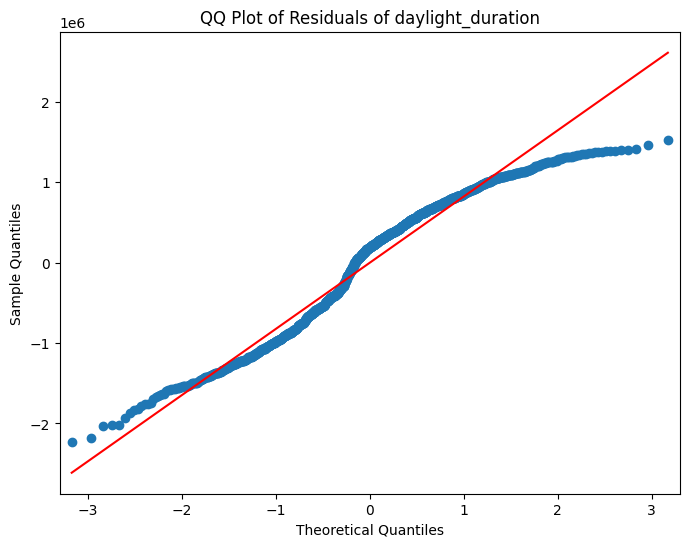

In [31]:


def qq_plot_residuals(df, target_col, feature_cols):

    y = df[target_col]
    X = df[feature_cols]
    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()
    residuals = model.resid

    plt.figure(figsize=(8, 6))
    qqplot(residuals, line='s', ax=plt.gca()) 
    plt.title(f"QQ Plot of Residuals of {feature_cols}")
    plt.show()

qq_plot_residuals(df, 'ridership', 'daylight_duration')

* As seen in the QQ Plot, overall, the daylight duration generally follows the red line trend but S-tail can be seen on the ends, suggesitng some normal assuption violation. We could experiment with other non-parametric and GML methods that does not rely on normality assumptions like K-NN Regression, Deision Tree Regression, Random Forest, etc. 

### Creating scatterplots so see how the numericla features correlate to Ridership

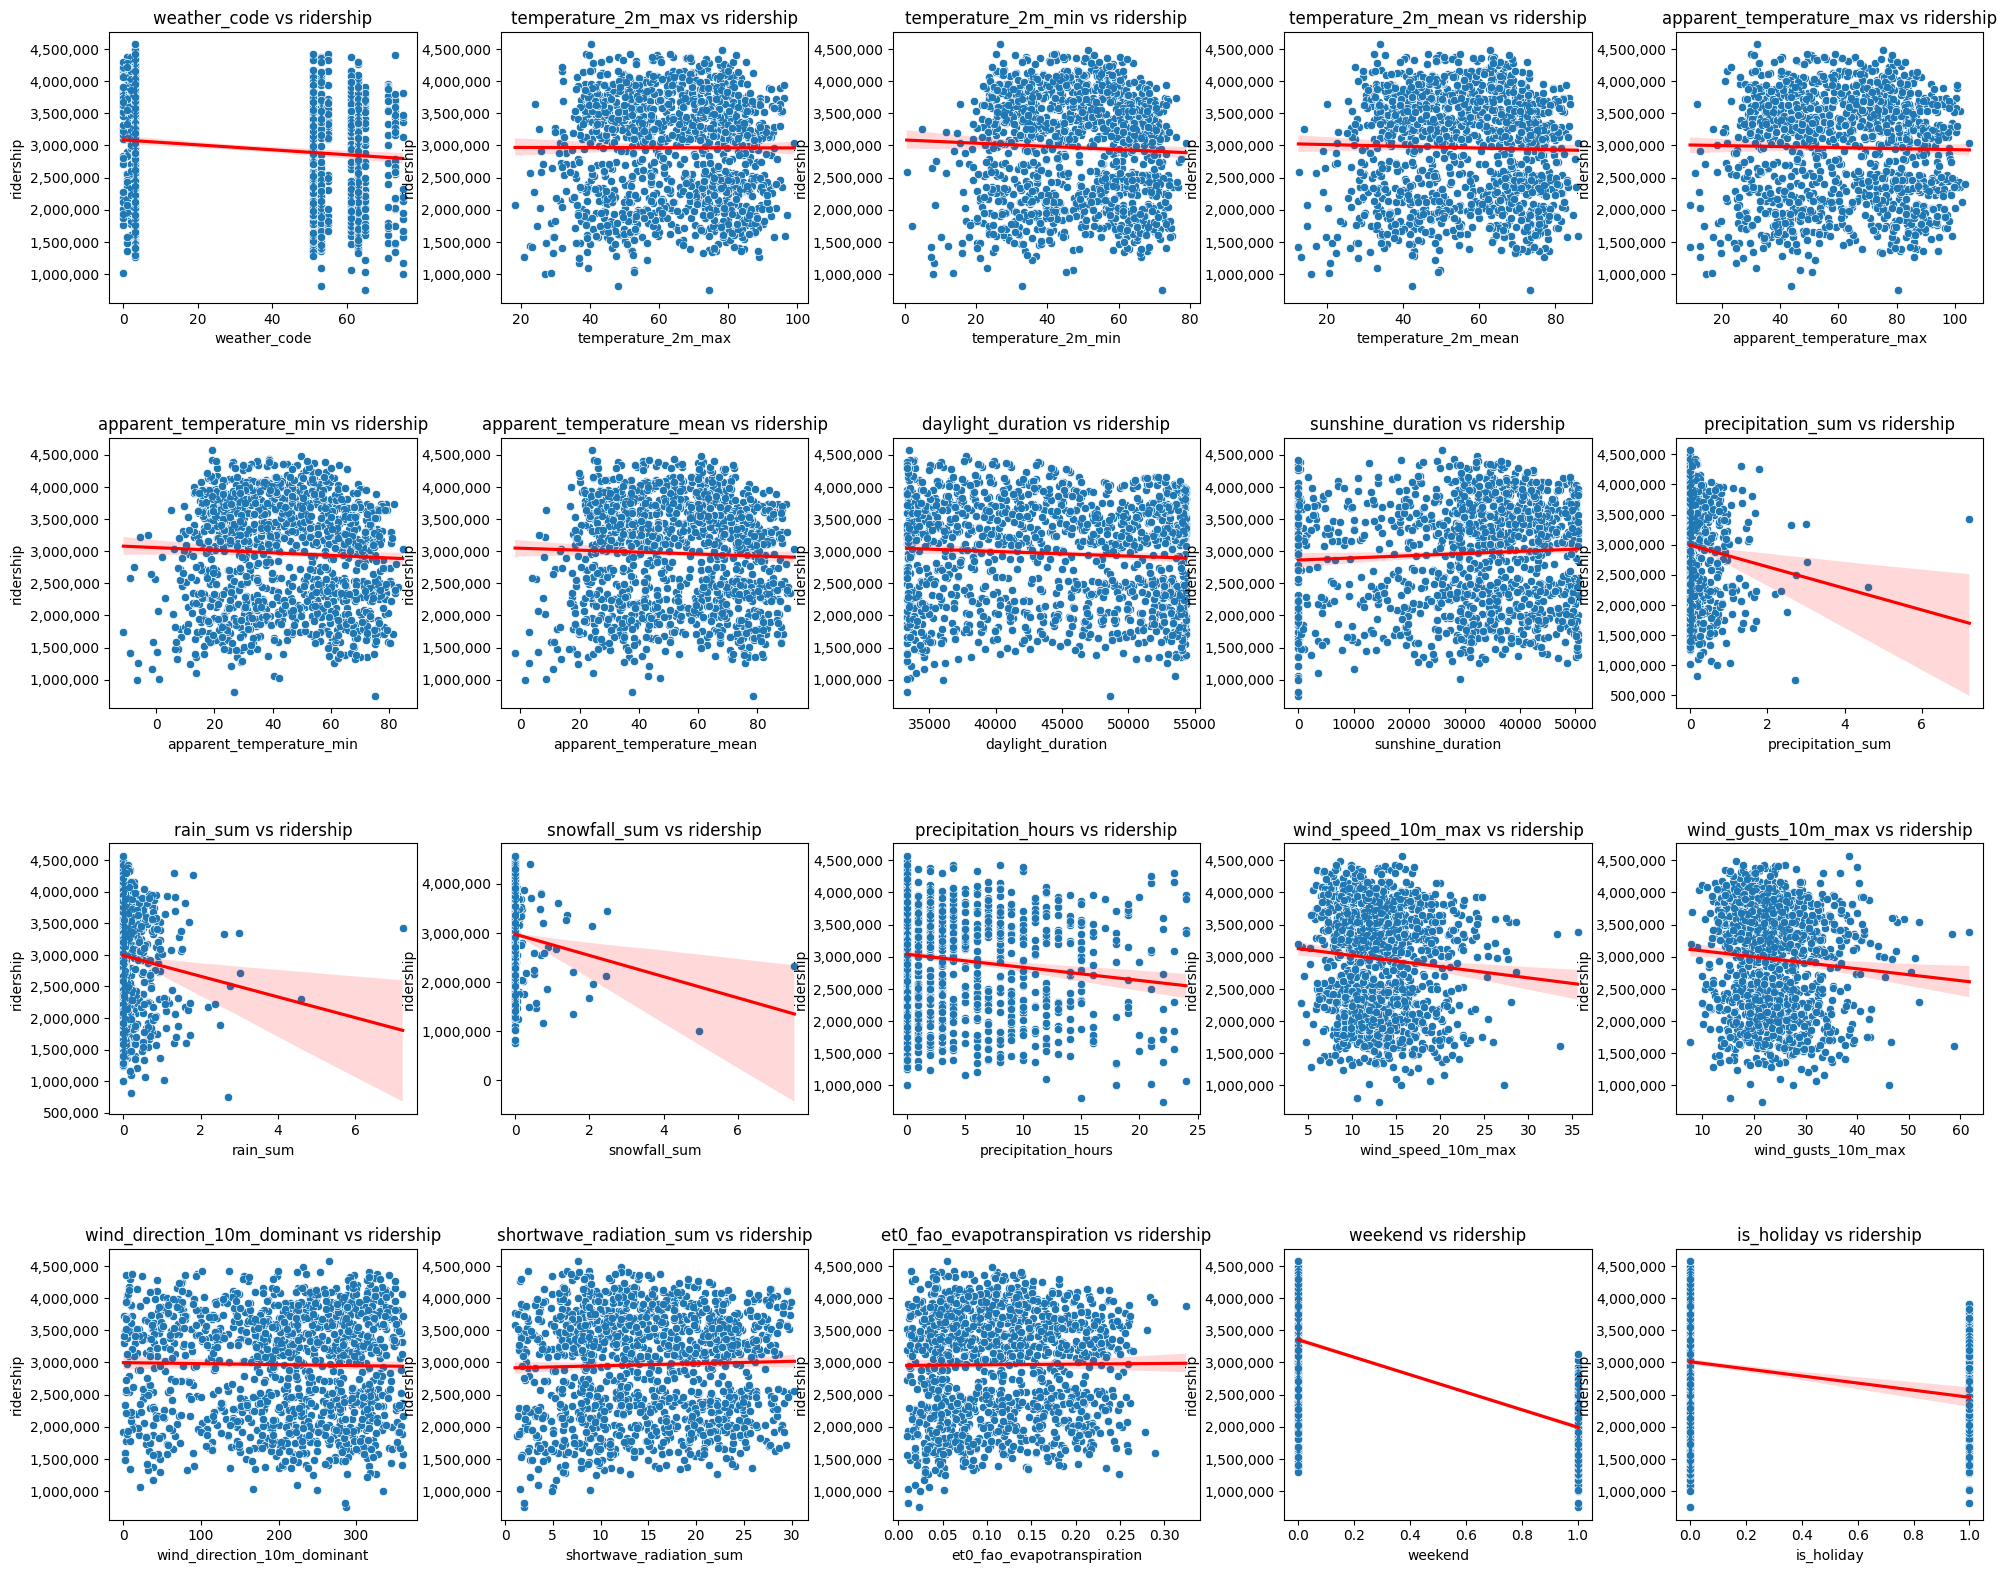

In [32]:
def scatter_subplots_vs_response(df, response_variable):
    feature_columns = [col for col in df.columns if col != response_variable]
    num_features = len(feature_columns)
    cols = 5
    rows = math.ceil(num_features / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
    fig.tight_layout(pad=3.0)

    for i, feature in enumerate(feature_columns):
        row = i // cols
        col = i % cols
        ax = axes[row, col] if rows > 1 else axes[col] #handles 1 row case

        sns.scatterplot(x=df[feature], y=df[response_variable], ax=ax)
        sns.regplot(x=df[feature], y=df[response_variable], ax=ax, scatter_kws={'s': 1}, line_kws={'color': 'red'}) #Adjust scatter size and line color as needed.

        ax.set_title(f"{feature} vs {response_variable}")
        ax.set_xlabel(feature)
        ax.set_ylabel(response_variable)
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

    for i in range(num_features, rows * cols):
        row = i // cols
        col = i % cols
        ax = axes[row, col] if rows > 1 else axes[col]
        fig.delaxes(ax)
    plt.subplots_adjust(hspace=0.5)
    plt.show()

scatter_subplots_vs_response(df.drop(['holidayName', 'date', 'weather_categories'], axis =1), 'ridership')

### Based on these scatter plots, we can tell that:
* snowfall, windspeed, rain/precipitations, weekend, and holiday have relatively stronger relationship with daily ridership
* Temperature measures such as min, max, mean, and apparent temperatures show relatively weaker relationship with daily ridership

## Analysing Categorical variables

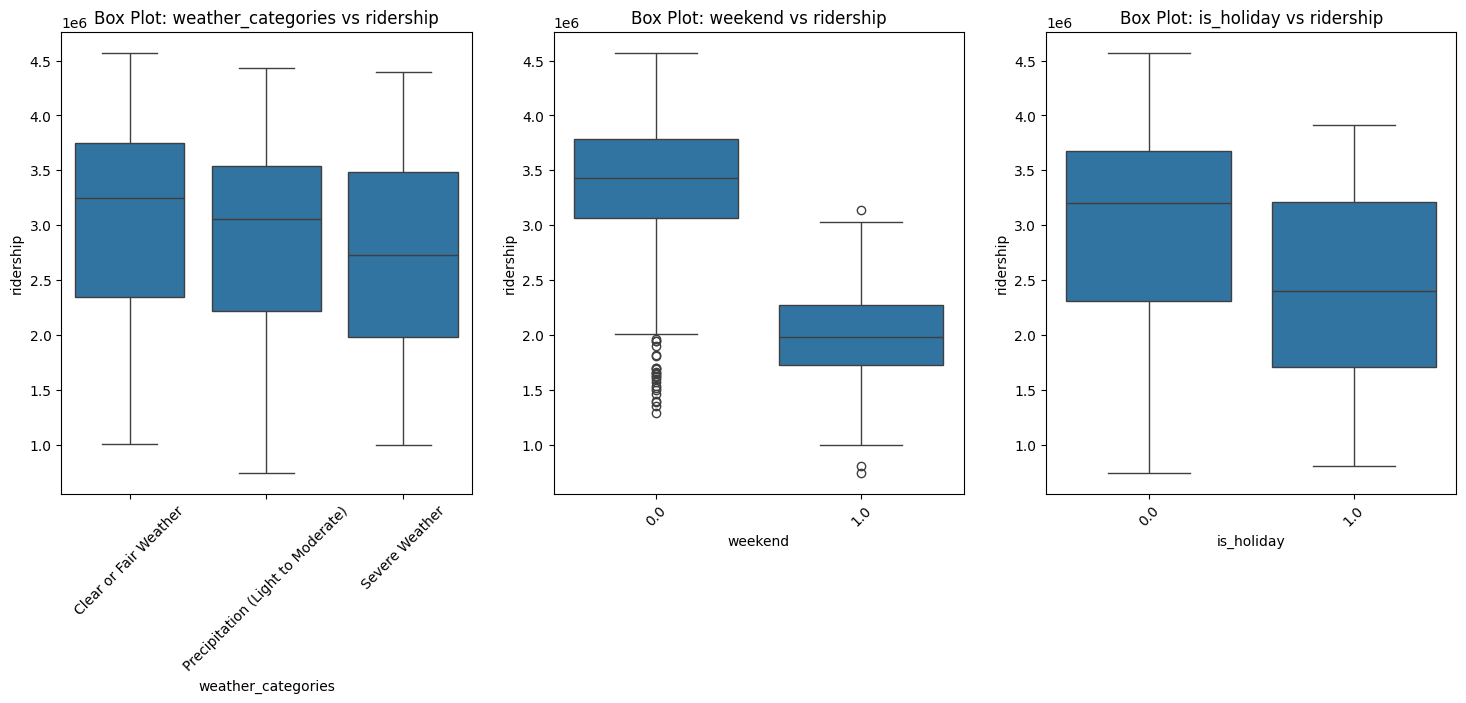

In [33]:
def boxplot_categorical_vs_response(df, categorical_features, response_variable):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for i, feature in enumerate(categorical_features):
        sns.boxplot(x=feature, y=response_variable, data=df, ax=axes[i])
        axes[i].set_title(f"Box Plot: {feature} vs {response_variable}")
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel(response_variable)
        axes[i].tick_params(axis='x', rotation=45)  
    plt.show()

category_cols = ['weather_categories', 'weekend', 'is_holiday']
boxplot_categorical_vs_response(df, category_cols, 'ridership')

* Clearly, we can see that the ridership differs across our categorical variables, which will be interesting to analyze further.

## Data cleaning and Feature engineering

Correlation between temperature fluctuation and temperature mean: 22.6286 


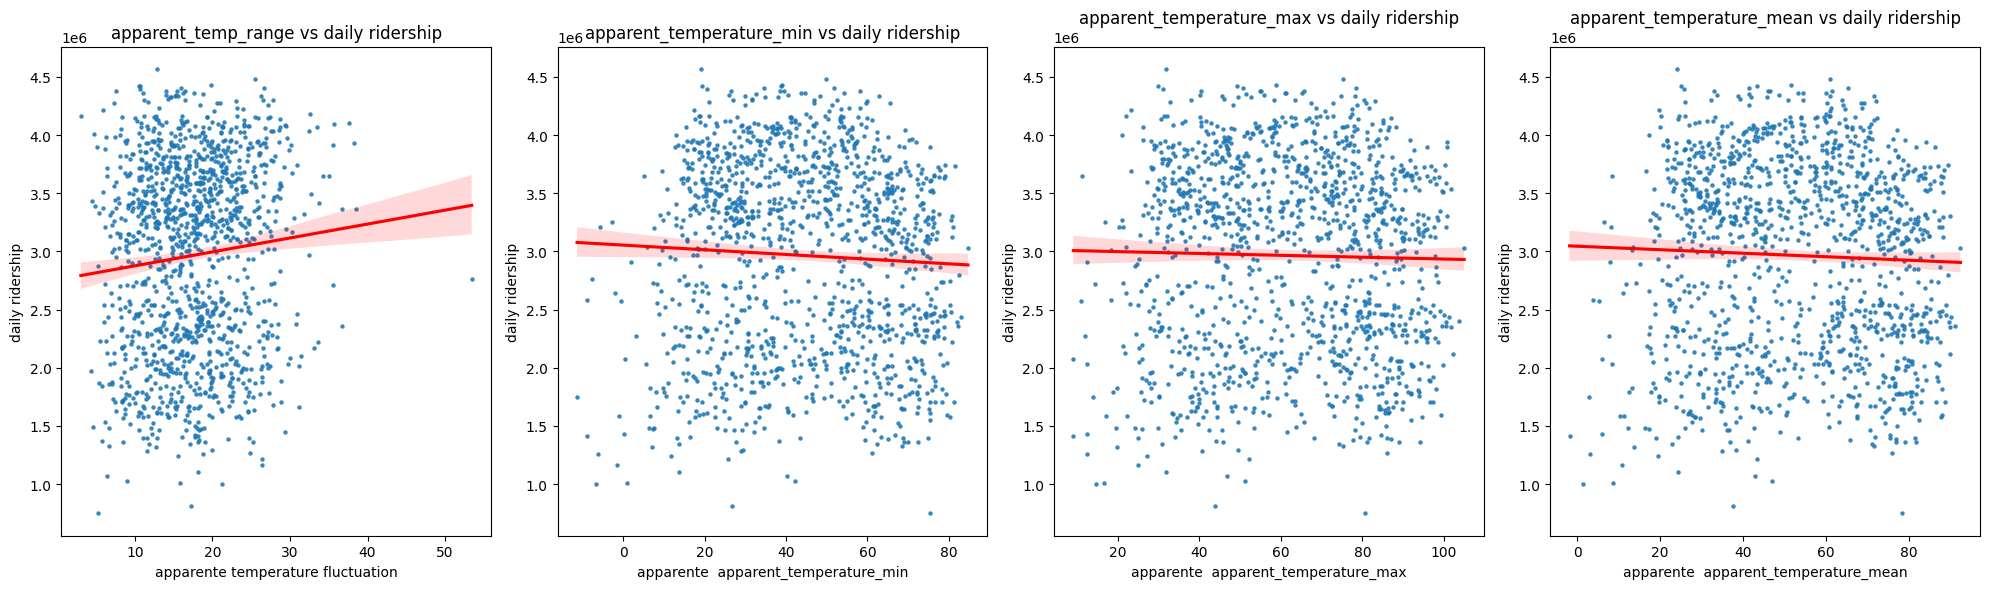

,date,weather_code,temperature_2m_mean,apparent_temperature_mean,daylight_duration,sunshine_duration,precipitation_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,weekend,ridership,holidayName,is_holiday,apparent_temp_range,temp_2m_range,weather_categories_Clear or Fair Weather,weather_categories_Precipitation (Light to Moderate),weather_categories_Severe Weather
0,2021-05-17,2.0,61.965496,59.330765,52304.660,48824.312,0.0,0.0,0.0,11.805341,219.91373,25.93,0.0,2029893,No holiday,0.0,27.062177,24.030000,1,0,0
1,2021-05-18,3.0,66.926750,64.101105,52414.355,48361.410,0.0,0.0,0.0,9.223387,254.71307,24.97,0.0,2160226,No holiday,0.0,28.330824,27.720000,1,0,0
2,2021-05-19,3.0,69.382990,67.238690,52521.727,49024.887,0.0,0.0,0.0,11.858211,350.79745,28.52,0.0,2267376,No holiday,0.0,28.296270,28.080000,1,0,0
3,2021-05-20,3.0,61.635498,58.842113,52626.652,49004.203,0.0,0.0,0.0,12.545163,145.46165,28.03,0.0,2278700,No holiday,0.0,15.383074,16.740000,1,0,0
4,2021-05-21,3.0,63.814250,61.701250,52728.977,49215.938,0.0,0.0,0.0,12.211643,173.92244,28.03,0.0,2338148,No holiday,0.0,22.319097,20.339998,1,0,0


In [34]:
cols_to_drop = [
    'temperature_2m_max','temperature_2m_min', # mean temp captures this info. it is 98% plus  correlated with mean
    'apparent_temperature_max', 'apparent_temperature_min', # mean apparent temperature (feels like temp) captures this, 98% plus correlated with mean
    'rain_sum', # duplicate of percepitation
    'wind_gusts_10m_max', # 96% correlated with wind_speed_10m_max
    'et0_fao_evapotranspiration' # dropping because it is derived from shortwave radiation
]

df["apparent_temp_range"] = df["apparent_temperature_max"] - df["apparent_temperature_min"] # creating a temperature fluctuation variable and removing min max
df["temp_2m_range"] = df["temperature_2m_max"] - df["temperature_2m_min"] # creating a temperature fluctuation variable and removing min max
correlation = df["apparent_temp_range"].corr(df["apparent_temperature_mean"])
print(f'Correlation between temperature fluctuation and temperature mean: {correlation * 100:.4f} ') # 22%, which is much better than min, max of 95% plus

fig, axes = plt.subplots(1,4,figsize = (20,6))

# plotting a scatter plot between apparent_temp_range vs daily ridership
sns.regplot(x="apparent_temp_range", y="ridership", data=df, scatter_kws={'s': 5}, line_kws={'color': 'red'}, ax=axes[0]) 
axes[0].set_xlabel("apparente temperature fluctuation")
axes[0].set_ylabel("daily ridership")
axes[0].set_title("apparent_temp_range vs daily ridership")

# plotting apparent_temp_min vs daily ridership
sns.regplot(x="apparent_temperature_min", y="ridership", data=df, scatter_kws={'s': 5}, line_kws={'color': 'red'}, ax=axes[1]) 
axes[1].set_xlabel("apparente  apparent_temperature_min")
axes[1].set_ylabel("daily ridership")
axes[1].set_title("apparent_temperature_min vs daily ridership")

# plotting apparent_temperature_max vs daily ridership
sns.regplot(x="apparent_temperature_max", y="ridership", data=df, scatter_kws={'s': 5}, line_kws={'color': 'red'}, ax=axes[2]) 
axes[2].set_xlabel("apparente  apparent_temperature_max")
axes[2].set_ylabel("daily ridership")
axes[2].set_title("apparent_temperature_max vs daily ridership")

# plotting apparent_temperature_max vs daily ridership
sns.regplot(x="apparent_temperature_mean", y="ridership", data=df, scatter_kws={'s': 5}, line_kws={'color': 'red'}, ax=axes[3]) 
axes[3].set_xlabel("apparente  apparent_temperature_mean")
axes[3].set_ylabel("daily ridership")
axes[3].set_title("apparent_temperature_mean vs daily ridership")

plt.tight_layout()
plt.show() 

df_clean = df.drop(cols_to_drop, axis=1)
df_clean.head()

# one hot encoded the weather categories
def one_hot_encode_pandas(df, categorical_col):
    df_encoded = pd.get_dummies(df, columns=[categorical_col], prefix=categorical_col)
    # converting boolean columns to 1/0
    for col in df_encoded.columns:
        if df_encoded[col].dtype == 'bool':
            df_encoded[col] = df_encoded[col].astype(int)
    return df_encoded
df_clean = one_hot_encode_pandas(df_clean, 'weather_categories')
df_clean.head()

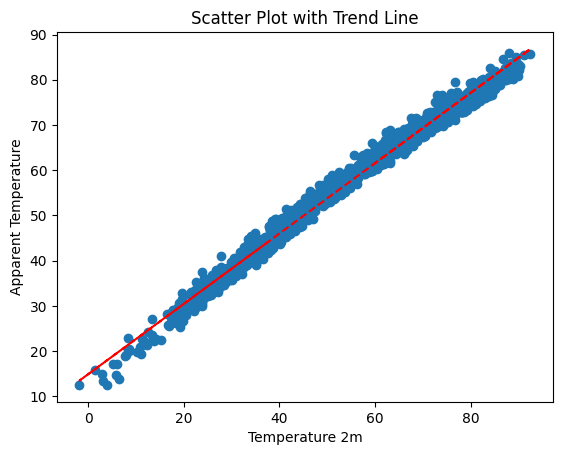

In [35]:
# Create the scatter plot
plt.scatter(df['apparent_temperature_mean'], df['temperature_2m_mean'])

# Add the trend line
z = np.polyfit(df['apparent_temperature_mean'], df['temperature_2m_mean'], 1) # 1 for linear trendline
p = np.poly1d(z)
plt.plot(df['apparent_temperature_mean'], p(df['apparent_temperature_mean']), "r--") # r-- makes the line dashed and red

# Add labels and title
plt.xlabel("Temperature 2m")
plt.ylabel("Apparent Temperature")
plt.title("Scatter Plot with Trend Line")

# Show the plot
plt.show()

### It is interesting to see that higher temperature fluctuation correlated with higher daily ridership. Temperature fluctuation seems to be a better predictor than temperature min and max. 

In [36]:
# scaling the right skewed columns such as percepitation, snow, etc.
def log_scale_columns(df, columns_to_log):
    df_copy = df.copy() 
    for col in columns_to_log:
        if col in df_copy.columns:
            # Handling potential zero or negative values by adding a small constant
            min_val = df_copy[col].min()
            if min_val <= 0:
                constant = abs(min_val) + 1  # Add a small constant to make all values positive
                df_copy[f'{col}_log'] = np.log(df_copy[col] + constant)
            else:
                df_copy[f'{col}_log'] = np.log(df_copy[col])
        else:
            print(f"Column '{col}' not found in DataFrame.")
            
        # Square Root Transformation (handle negative values)
        if (df_copy[col] < 0).any():
            print(f"Warning: {col} contains negative values. Square root transformation skipped.")
            print(f"Negative values found at indices: {df_copy[df_copy[col] < 0].index.tolist()}")
            df_copy[f'{col}_sqrt'] = np.nan
        else:
            df_copy[f'{col}_sqrt'] = np.sqrt(df_copy[col])
        
        # Box-Cox Transformation (handle non-positive values)
        if min_val <= 0:
            # print(f"Warning: {col} contains non-positive values. Box-Cox transformation skipped.")
            # print(f"Negative values found at indices: {df_copy[df_copy[col] < 0].index.tolist()}")
            constant = abs(min_val) + 0.001  # Add a small constant to make all values positive
            df_copy[f'{col}_boxcox'], lambda_val = stats.boxcox(df_copy[col] + constant)
            df_copy[f'{col}_boxcox_lambda'] = lambda_val            # df_copy[f'{col}_boxcox'] = np.nan
            # df_copy[f'{col}_boxcox_lambda'] = np.nan
        else:
            df_copy[f'{col}_boxcox'], lambda_val = stats.boxcox(df_copy[col])
            df_copy[f'{col}_boxcox_lambda'] = lambda_val

    return df_copy

cols_to_log = ['precipitation_sum', 'precipitation_hours', 'snowfall_sum'] 
df_clean_trans = log_scale_columns(df_clean, cols_to_log)
df_clean_trans.head()


,date,weather_code,temperature_2m_mean,apparent_temperature_mean,daylight_duration,sunshine_duration,precipitation_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,weekend,ridership,holidayName,is_holiday,apparent_temp_range,temp_2m_range,weather_categories_Clear or Fair Weather,weather_categories_Precipitation (Light to Moderate),weather_categories_Severe Weather,precipitation_sum_log,precipitation_sum_sqrt,precipitation_sum_boxcox,precipitation_sum_boxcox_lambda,precipitation_hours_log,precipitation_hours_sqrt,precipitation_hours_boxcox,precipitation_hours_boxcox_lambda,snowfall_sum_log,snowfall_sum_sqrt,snowfall_sum_boxcox,snowfall_sum_boxcox_lambda
0,2021-05-17,2.0,61.965496,59.330765,52304.660,48824.312,0.0,0.0,0.0,11.805341,219.91373,25.93,0.0,2029893,No holiday,0.0,27.062177,24.030000,1,0,0,0.0,0.0,-13.76955,-0.181086,0.0,0.0,-6.953682,-0.001916,0.0,0.0,-1.224020e+10,-3.545836
1,2021-05-18,3.0,66.926750,64.101105,52414.355,48361.410,0.0,0.0,0.0,9.223387,254.71307,24.97,0.0,2160226,No holiday,0.0,28.330824,27.720000,1,0,0,0.0,0.0,-13.76955,-0.181086,0.0,0.0,-6.953682,-0.001916,0.0,0.0,-1.224020e+10,-3.545836
2,2021-05-19,3.0,69.382990,67.238690,52521.727,49024.887,0.0,0.0,0.0,11.858211,350.79745,28.52,0.0,2267376,No holiday,0.0,28.296270,28.080000,1,0,0,0.0,0.0,-13.76955,-0.181086,0.0,0.0,-6.953682,-0.001916,0.0,0.0,-1.224020e+10,-3.545836
3,2021-05-20,3.0,61.635498,58.842113,52626.652,49004.203,0.0,0.0,0.0,12.545163,145.46165,28.03,0.0,2278700,No holiday,0.0,15.383074,16.740000,1,0,0,0.0,0.0,-13.76955,-0.181086,0.0,0.0,-6.953682,-0.001916,0.0,0.0,-1.224020e+10,-3.545836
4,2021-05-21,3.0,63.814250,61.701250,52728.977,49215.938,0.0,0.0,0.0,12.211643,173.92244,28.03,0.0,2338148,No holiday,0.0,22.319097,20.339998,1,0,0,0.0,0.0,-13.76955,-0.181086,0.0,0.0,-6.953682,-0.001916,0.0,0.0,-1.224020e+10,-3.545836


## Creating transformations (log, square root, and Boxcox) for skewed features like precipitations and snow fall.

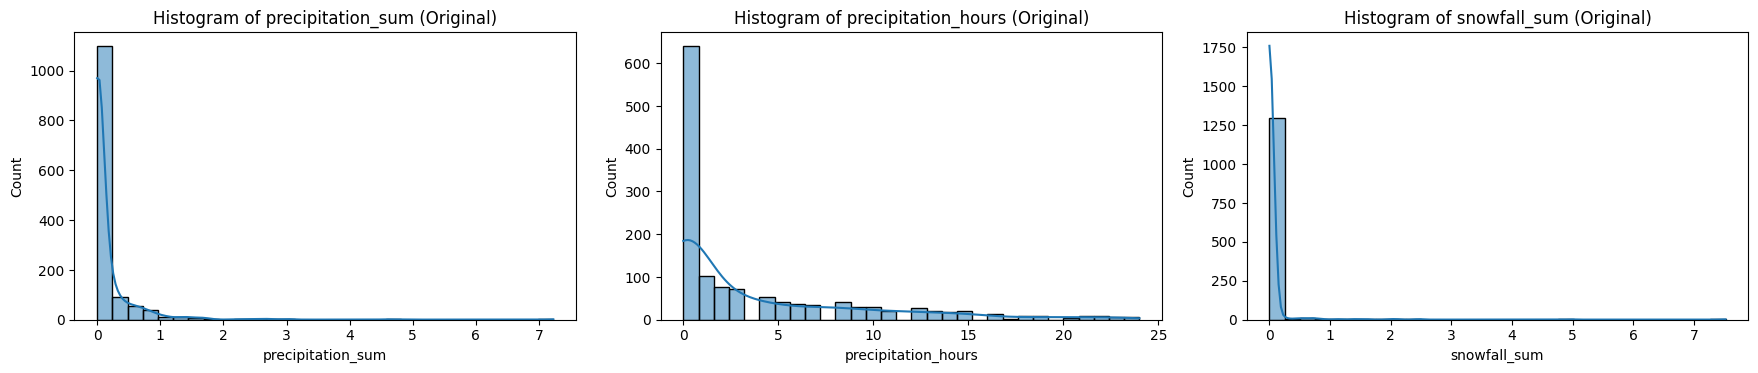

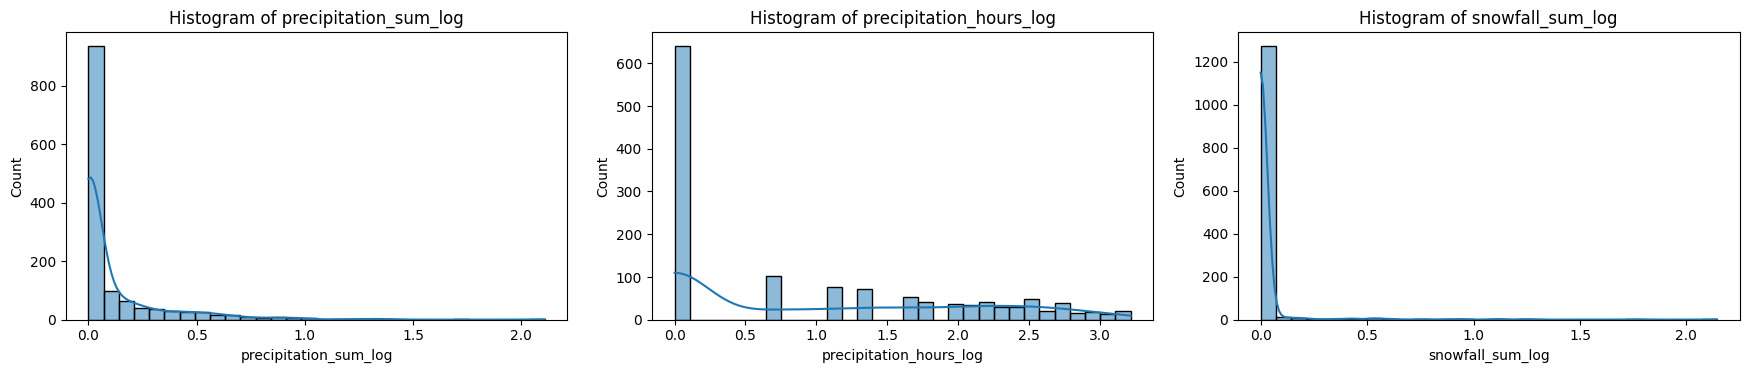

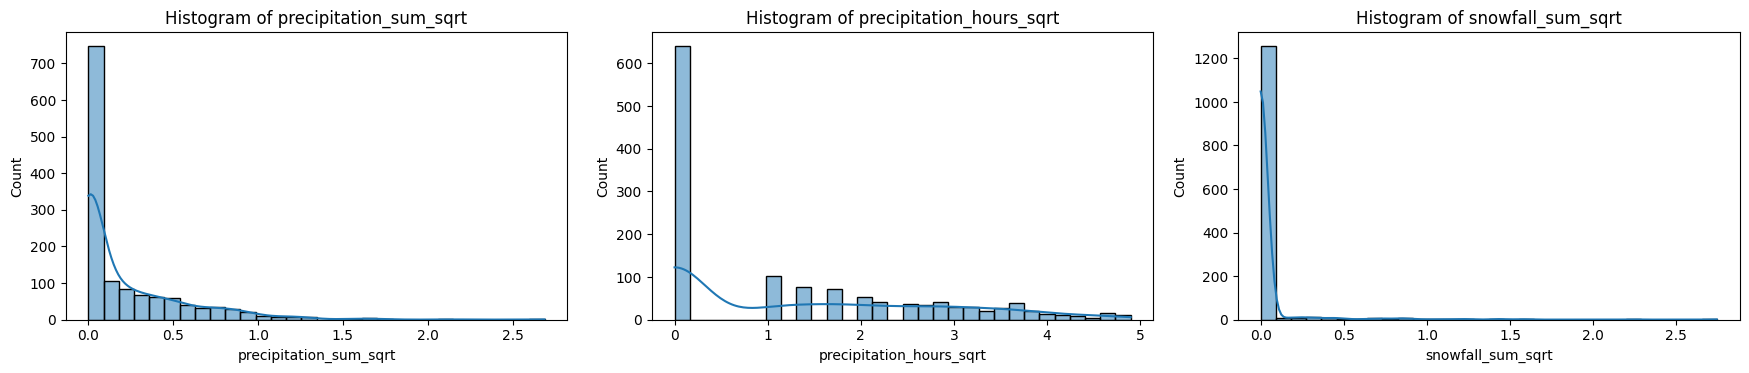

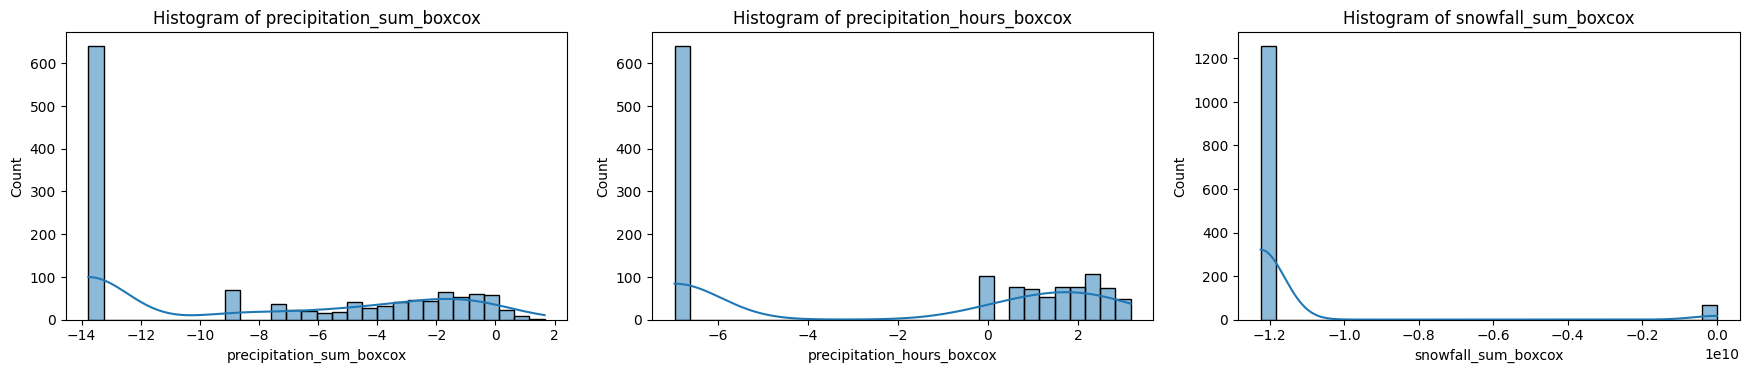

In [37]:
# Create figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(3*6,4))
fig.tight_layout(pad=3.0) #adjust padding as needed.

# Numerical Features Analysis
for i, feature in enumerate(cols_to_log):
    # Histograms
    ax = axes[i]
    sns.histplot(df_clean_trans[feature], kde=True, ax=ax, bins = 30)
    ax.set_title(f"Histogram of {feature} (Original)")

# plotting log transformed features
log_cols = [f"{col}_log" for col in cols_to_log]
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
fig.tight_layout(pad=3.0)
for i, feature in enumerate(log_cols):
    # Histograms
    ax = axes[i]
    sns.histplot(df_clean_trans[feature], kde=True, ax=ax, bins = 30)
    ax.set_title(f"Histogram of {feature}")

# plotting square root transformed features
sqrt_cols = [f"{col}_sqrt" for col in cols_to_log]
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
fig.tight_layout(pad=3.0)
for i, feature in enumerate(sqrt_cols):
    # Histograms
    ax = axes[i]
    sns.histplot(df_clean_trans[feature], kde=True, ax=ax, bins = 30)
    ax.set_title(f"Histogram of {feature}")

boxcox_cols = [f"{col}_boxcox" for col in cols_to_log]
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
fig.tight_layout(pad=3.0)
for i, feature in enumerate(boxcox_cols):
    # Histograms
    ax = axes[i]
    sns.histplot(df_clean_trans[feature], kde=True, ax=ax, bins = 30)
    ax.set_title(f"Histogram of {feature}")



### Our transformations did not help much since these features still look skewed. Specially snowfall is highly skewed with mean: 0.034, min is 0.0, Q1 25%: 0, Q3 75%: 1.0, max: 7.53, and std: 0.305. We will probably drop the snow variable in linear regression and consider it when training other non-pametric approaches. Snowfall is indirectly categorized in the weather_categories anyway

In [38]:
# Let's test for Multicollinearity usign Variance Inflaction Factor (VIF) 
df_vif = df_clean.drop(['date',  'holidayName'], axis=1, errors='ignore')
df_vif = df_vif.apply(pd.to_numeric, errors='coerce')

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(len(df_vif.columns))]

print(vif_data)

                                              feature         VIF
0                                        weather_code   94.545679
1                                 temperature_2m_mean  184.444471
2                           apparent_temperature_mean  188.634792
3                                   daylight_duration    8.297791
4                                   sunshine_duration    9.981207
5                                   precipitation_sum    2.254714
6                                        snowfall_sum    1.366605
7                                 precipitation_hours    4.474968
8                                  wind_speed_10m_max    2.068008
9                         wind_direction_10m_dominant    1.216978
10                            shortwave_radiation_sum   20.241287
11                                            weekend    2.666362
12                                          ridership    2.973741
13                                         is_holiday    1.186599
14        

In [39]:
multicorr_cols_to_drop = ['date', 'weather_code', 
                          'temperature_2m_mean',
                          'holidayName',
                          'weather_categories_Clear or Fair Weather',# dropping 'weather_categories_Clear or Fair Weather' to avoid multicollineariity. we will still be able to interpret it relative to other reference categories.
                          'daylight_duration',
                          'shortwave_radiation_sum'] # droping because it is higly correlated with temperature, sun light duration,and shortware_radiation
df_cleaned_vif = df_clean.drop(multicorr_cols_to_drop, axis=1)

# rechecking the VIF
df_vif = df_cleaned_vif.apply(pd.to_numeric, errors='coerce')

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(len(df_vif.columns))]
print(vif_data)


                                              feature        VIF
0                           apparent_temperature_mean  13.482847
1                                   sunshine_duration  14.542309
2                                   precipitation_sum   2.340456
3                                        snowfall_sum   1.380404
4                                 precipitation_hours   5.649906
5                                  wind_speed_10m_max  11.095269
6                         wind_direction_10m_dominant   5.861767
7                                             weekend   2.039132
8                                           ridership  14.447147
9                                          is_holiday   1.123170
10                                apparent_temp_range  61.780207
11                                      temp_2m_range  78.664046
12  weather_categories_Precipitation (Light to Mod...   3.658896
13                  weather_categories_Severe Weather   1.718222


In [40]:
print('Count of Light to Moderate weather', df_cleaned_vif['weather_categories_Precipitation (Light to Moderate)'].sum())
print('Count of Severe Weather', df_cleaned_vif['weather_categories_Severe Weather'].sum())
df_cleaned_vif.head()


Count of Light to Moderate weather 617
Count of Severe Weather 67


,apparent_temperature_mean,sunshine_duration,precipitation_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_direction_10m_dominant,weekend,ridership,is_holiday,apparent_temp_range,temp_2m_range,weather_categories_Precipitation (Light to Moderate),weather_categories_Severe Weather
0,59.330765,48824.312,0.0,0.0,0.0,11.805341,219.91373,0.0,2029893,0.0,27.062177,24.030000,0,0
1,64.101105,48361.410,0.0,0.0,0.0,9.223387,254.71307,0.0,2160226,0.0,28.330824,27.720000,0,0
2,67.238690,49024.887,0.0,0.0,0.0,11.858211,350.79745,0.0,2267376,0.0,28.296270,28.080000,0,0
3,58.842113,49004.203,0.0,0.0,0.0,12.545163,145.46165,0.0,2278700,0.0,15.383074,16.740000,0,0
4,61.701250,49215.938,0.0,0.0,0.0,12.211643,173.92244,0.0,2338148,0.0,22.319097,20.339998,0,0


## So far, we have two datasaets. 1) Cleaned data with few multicollineariy cols 2) Cleaned data with VIF cols dropped

In [41]:
print(df_clean.columns.to_list())
print(df_cleaned_vif.columns.to_list())

# exporting daily ridership cleaned data 
output_file = "./data/cleaned_daily_ridership_weather_holi_data.csv"
df_clean.to_csv(output_file, index=False)


['date', 'weather_code', 'temperature_2m_mean', 'apparent_temperature_mean', 'daylight_duration', 'sunshine_duration', 'precipitation_sum', 'snowfall_sum', 'precipitation_hours', 'wind_speed_10m_max', 'wind_direction_10m_dominant', 'shortwave_radiation_sum', 'weekend', 'ridership', 'holidayName', 'is_holiday', 'apparent_temp_range', 'temp_2m_range', 'weather_categories_Clear or Fair Weather', 'weather_categories_Precipitation (Light to Moderate)', 'weather_categories_Severe Weather']
['apparent_temperature_mean', 'sunshine_duration', 'precipitation_sum', 'snowfall_sum', 'precipitation_hours', 'wind_speed_10m_max', 'wind_direction_10m_dominant', 'weekend', 'ridership', 'is_holiday', 'apparent_temp_range', 'temp_2m_range', 'weather_categories_Precipitation (Light to Moderate)', 'weather_categories_Severe Weather']
